<a href="https://colab.research.google.com/github/KuzmenkoO/taskForAmazinum/blob/main/TASK_for_AMAZINUM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Згенеровані висоти: [76, 89, 10, 93, 81, 23, 43, 70, 43, 23, 73, 89, 17, 63, 29, 91, 88, 37, 19, 50]
Глибина найглибшого озера: 79


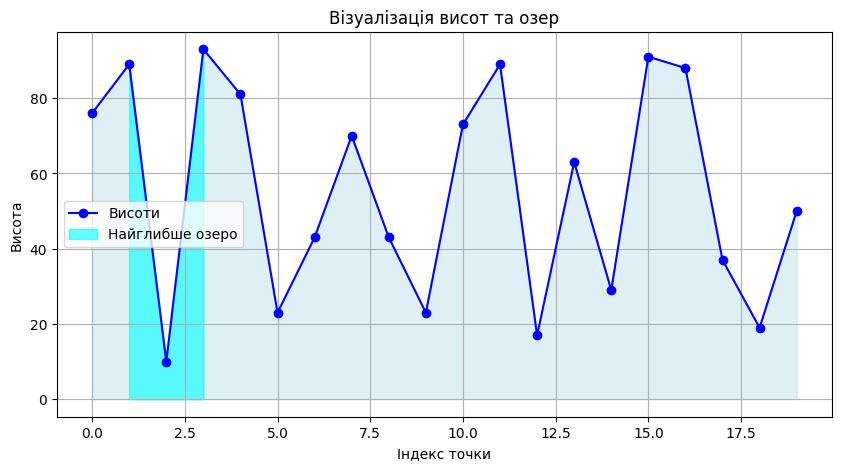

In [5]:
import random
import matplotlib.pyplot as plt

# 1) Генеруємо список із 20 випадкових чисел від 0 до 100
heights = [random.randint(0, 100) for _ in range(20)]
print("Згенеровані висоти:", heights)


# 2) Функція для знаходження глибини найглибшого озера
def find_lake_depth(heights):
    max_depth = 0  # Початкова глибина
    lake_start, lake_end = -1, -1  # Індекси найглибшого озера

    for i in range(len(heights)):
        for j in range(i + 2, len(heights)):
            if heights[i] > heights[i + 1] and heights[j] > heights[j - 1]:
                depth = min(heights[i], heights[j]) - min(heights[i + 1:j])
                if depth > max_depth:
                    max_depth = depth
                    lake_start, lake_end = i, j

    return max_depth, lake_start, lake_end


# Знаходимо найглибше озеро
deepest_lake, start, end = find_lake_depth(heights)
print("Глибина найглибшого озера:", deepest_lake)

# 3) Візуалізація висот і озер
plt.figure(figsize=(10, 5))
plt.plot(heights, marker='o', linestyle='-', color='blue', label='Висоти')
plt.fill_between(range(len(heights)), heights, color='lightblue', alpha=0.4)

# Підсвічуємо найглибше озеро
if start != -1 and end != -1:
    plt.fill_between(range(start, end + 1), heights[start:end + 1], color='cyan', alpha=0.6, label='Найглибше озеро')

plt.xlabel("Індекс точки")
plt.ylabel("Висота")
plt.title("Візуалізація висот та озер")
plt.legend()
plt.grid()
plt.show()


Початкова матриця:
[[0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0]
 [0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1]
 [1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0]
 [0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1]
 [1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1]
 [0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1]
 [0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1]
 [0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1]
 [0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0]
 [1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0]
 [1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0]
 [0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0]
 [1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1]
 [0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1]
 [0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1]
 [1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0]
 [0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1]
 [0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0]
 [0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1]]
Матриця після 20 кроків:
[[0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1]
 [0 0 0 0

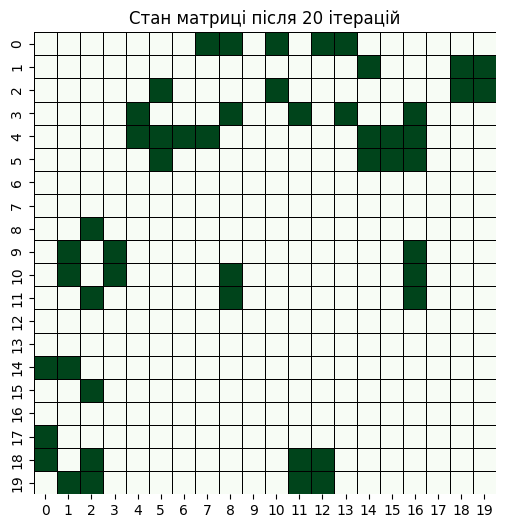

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Генеруємо матрицю 20x20 з випадковими бінарними значеннями
size = 20
matrix = np.random.choice([0, 1], size=(size, size))
print("Початкова матриця:")
print(matrix)

# 2) Функція для виконання одного кроку симуляції життя клітин
def next_generation(matrix):
    new_matrix = np.copy(matrix)  # Копіюємо початкову матрицю

    for i in range(size):
        for j in range(size):
            # Визначаємо сусідів у межах матриці
            neighbors = matrix[max(0, i-1):min(size, i+2), max(0, j-1):min(size, j+2)]
            alive_neighbors = np.sum(neighbors) - matrix[i, j]

            # Правила оновлення клітин
            if matrix[i, j] == 1 and (alive_neighbors < 2 or alive_neighbors > 3):
                new_matrix[i, j] = 0  # Клітина вмирає
            elif matrix[i, j] == 0 and alive_neighbors == 3:
                new_matrix[i, j] = 1  # Клітина оживає

    return new_matrix

# 3) Запускаємо 20 ітерацій
steps = 20
for _ in range(steps):
    matrix = next_generation(matrix)

print("Матриця після 20 кроків:")
print(matrix)

# 4) Візуалізація результатів
plt.figure(figsize=(6, 6))
sns.heatmap(matrix, cmap="Greens", cbar=False, linewidths=0.5, linecolor='black', square=True)
plt.title("Стан матриці після 20 ітерацій")
plt.show()
